In [1]:
from PIL import Image
import colorsys
import numpy as np

In [2]:
# two pieces of input information: color code for desired hue, and input image
desired_color_hex = '#06569a' # the blue used in OMB logo
original_image = Image.open('./data/congestion_zone_map.png')

In [3]:
# get the hue from the hex code:
desired_color_rgb = list([int(desired_color_hex[i:i+2], 16)/255.0 for i in (1,3,5)])
desired_color_hsv = colorsys.rgb_to_hsv(*desired_color_rgb)
desired_hue=desired_color_hsv[0]

In [4]:
# convert RGBA image to CSV:
out_image = original_image.convert('HSV')

In [5]:
out_image = np.asarray(out_image)
h, s, v = np.rollaxis(out_image, axis=-1)

In [6]:
# assign hue layer to the desired hue:
h = np.vectorize(lambda h: int(255*desired_hue))(h)

In [7]:
# rearrange layers:
out_image = np.dstack((h, s, v))

In [8]:
# convert back into a PIL image
out_image = Image.fromarray(out_image.astype('uint8'), mode='HSV')

In [9]:
# HSV -> RGB
out_image = out_image.convert('RGBA')

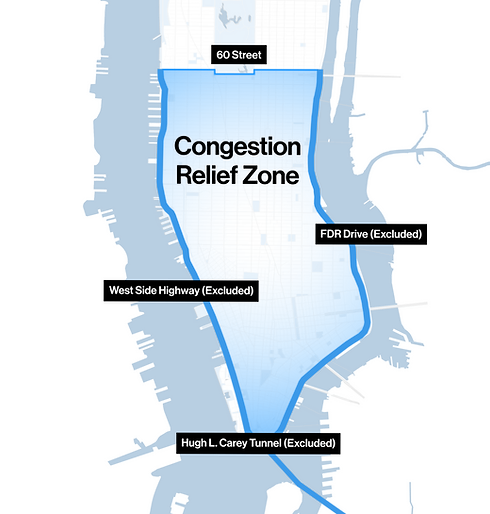

In [10]:
display(out_image)

In [11]:
out_image.save('./data/out_image.png')